In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import numpy as np

Loading the train data

In [3]:
df = pd.read_csv('drugLibTrain_raw.tsv', delimiter='\t')

Checking data

In [4]:
print(df.head())

   Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that

Shape of the data


In [5]:
print(df.shape)

(3107, 9)


Data type of each Column

In [6]:
print(df.dtypes)

Unnamed: 0            int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object


Checking for missing values

In [7]:
print(df.isnull().sum())

Unnamed: 0            0
urlDrugName           0
rating                0
effectiveness         0
sideEffects           0
condition             1
benefitsReview       18
sideEffectsReview    75
commentsReview       12
dtype: int64


Checking the distribution of the target variables

In [8]:
print(df['rating'].value_counts())
print(df['effectiveness'].value_counts())
print(df['sideEffects'].value_counts())
print(df['commentsReview'].value_counts())

rating
10    742
8     558
9     480
7     350
1     305
5     159
6     157
3     146
4     107
2     103
Name: count, dtype: int64
effectiveness
Highly Effective          1330
Considerably Effective     928
Moderately Effective       415
Ineffective                247
Marginally Effective       187
Name: count, dtype: int64
sideEffects
Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: count, dtype: int64
commentsReview
none                                                                                                                                                                                                                                                                                                                                                                                                                                         

Statistical summary of the numerical columns

In [9]:
print(df.describe())
print(df['rating'])

        Unnamed: 0       rating
count  3107.000000  3107.000000
mean   2080.607016     7.006115
std    1187.998828     2.937582
min       0.000000     1.000000
25%    1062.500000     5.000000
50%    2092.000000     8.000000
75%    3092.500000     9.000000
max    4161.000000    10.000000
0        4
1        1
2       10
3        3
4        2
        ..
3102    10
3103     1
3104     2
3105     8
3106     4
Name: rating, Length: 3107, dtype: int64


Check the unique values of the categorical columns

In [10]:
print(df['effectiveness'].unique())
print(df['sideEffects'].unique())
print(df['commentsReview'].unique())

['Highly Effective' 'Marginally Effective' 'Ineffective'
 'Considerably Effective' 'Moderately Effective']
['Mild Side Effects' 'Severe Side Effects' 'No Side Effects'
 'Extremely Severe Side Effects' 'Moderate Side Effects']
['monitor blood pressure , weight and asses for resolution of fluid'
 'I Hate This Birth Control, I Would Not Suggest This To Anyone.'
 'I took 2 pills at the onset of my menstrual cramps and then every 8-12 hours took 1 pill as needed for about 3-4 days until cramps were over. If cramps are bad, make sure to take every 8 hours on the dot because the medication stops working suddenly and unfortunately takes about an hour to an hour and a half to kick back in.. if cramps are only moderate, taking every 12 hours is okay.'
 ... '---'
 'Started at 2 doses of 300 mg a day and worked up to 4 doses per day over a six month period. Only at 1200 mg a day did the drug control the seizures. During each time when I increased the dosage, I founf the side-effects worsened, but 

Visualize the data 

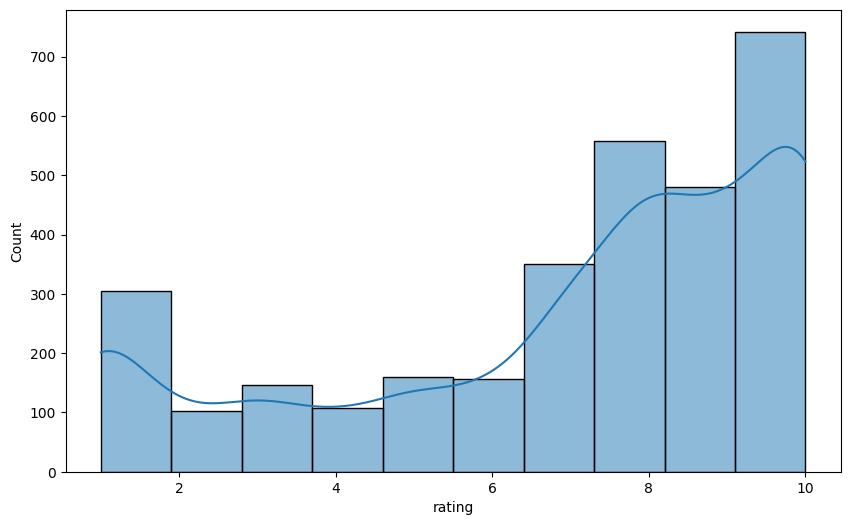

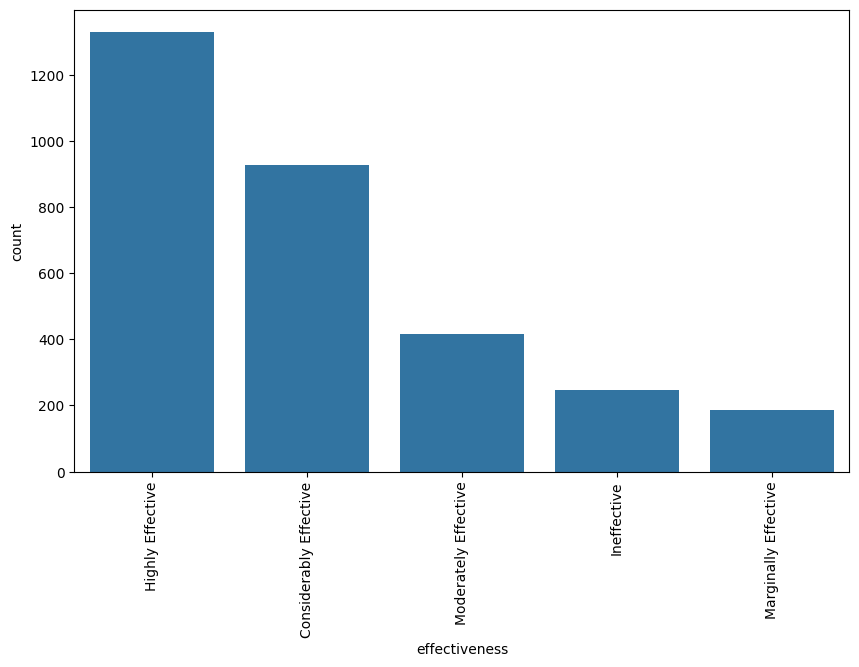

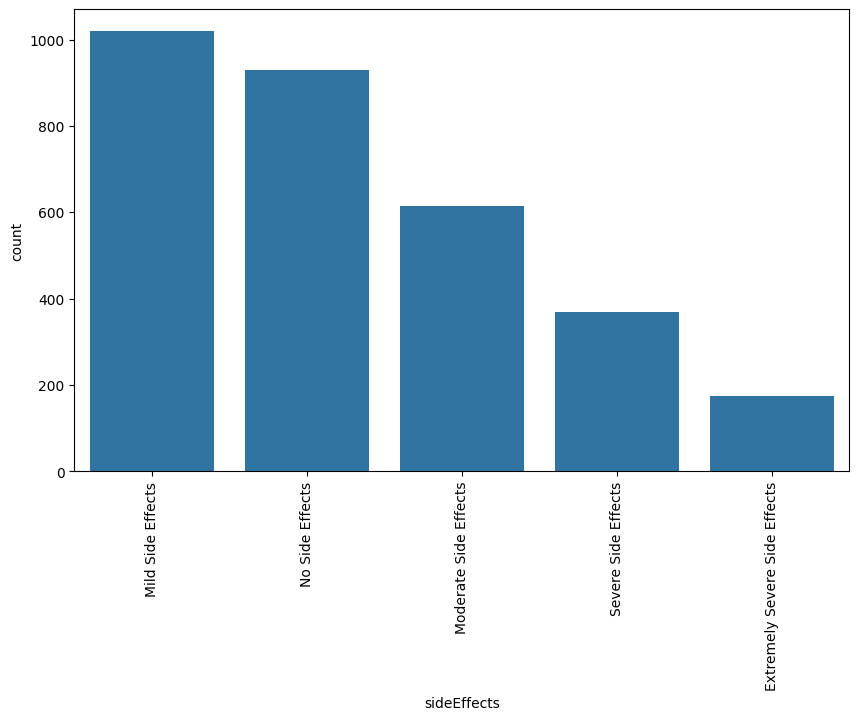

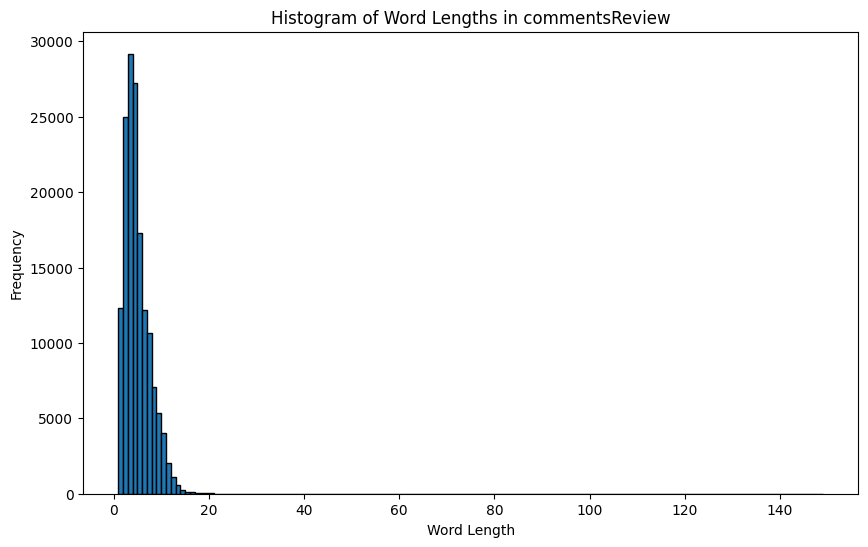

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the rating
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.show()

# Countplot of the effectiveness
plt.figure(figsize=(10, 6))
sns.countplot(x='effectiveness', data=df, order=df['effectiveness'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Countplot of the sideEffects
plt.figure(figsize=(10, 6))
sns.countplot(x='sideEffects', data=df, order=df['sideEffects'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

words = ' '.join(str(review) for review in df['commentsReview']).split()

# Get the length of each word
word_lengths = [len(word) for word in words]

# Plot a histogram of word lengths
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=range(1, max(word_lengths)), edgecolor='black')
plt.title('Histogram of Word Lengths in commentsReview')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

The most common words commentsReview

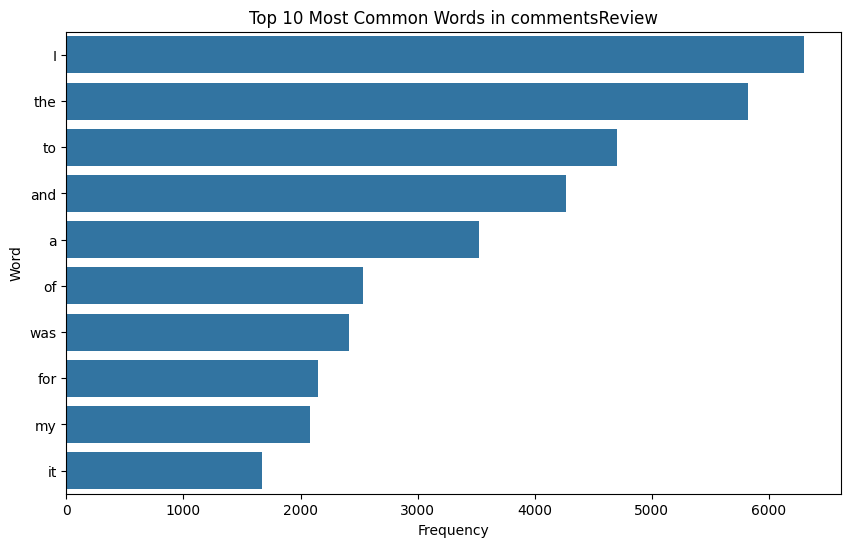

In [12]:
from collections import Counter
import seaborn as sns

# Convert reviews to strings and tokenize
words = ' '.join(str(review) for review in df['commentsReview']).split()

# Count the frequency of each word
word_counts = Counter(words)

# Convert to a DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
word_counts_df.columns = ['Word', 'Frequency']

# Sort by frequency and take the top 10 words
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_counts_df, orient='h')
plt.title('Top 10 Most Common Words in commentsReview')
plt.show()

Word Cloud Visualization of Benefits Review

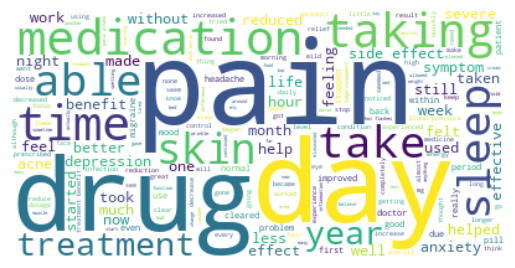

In [13]:
from wordcloud import WordCloud

# Combine all reviews into one big text
text = ' '.join(str(review) for review in df['benefitsReview'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud Visualization of Effectiveness

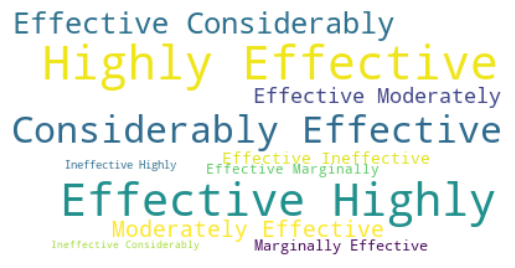

In [14]:
text = ' '.join(str(review) for review in df['effectiveness'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud Visualization of Commentsreview

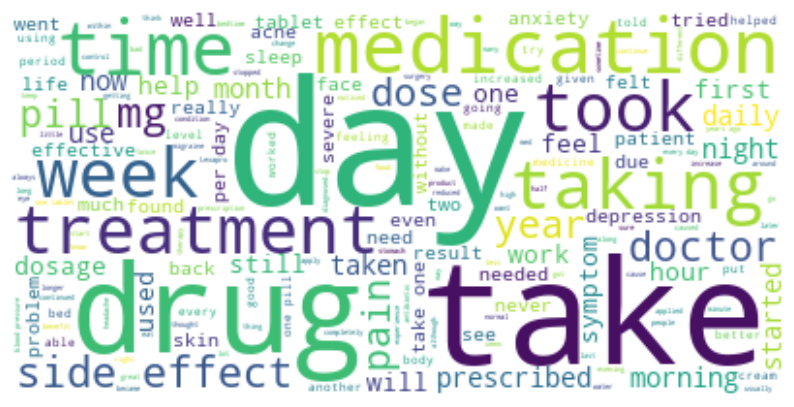

In [15]:
# Combine all reviews into one big text
text = ' '.join(str(review) for review in df['commentsReview'])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Data Preprocessing

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert text to string in case it's not
    text = str(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove punctuation

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back to a single string
    text = " ".join(words)
    return text

df['benefitsReview'] = df['benefitsReview'].apply(preprocess_text)
df['effectiveness'] = df['effectiveness'].apply(preprocess_text)
df['commentsReview'] = df['commentsReview'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vickyprince/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vickyprince/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vickyprince/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


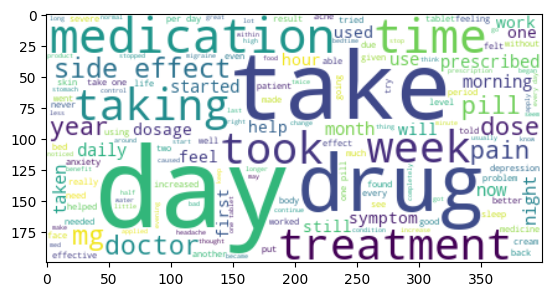

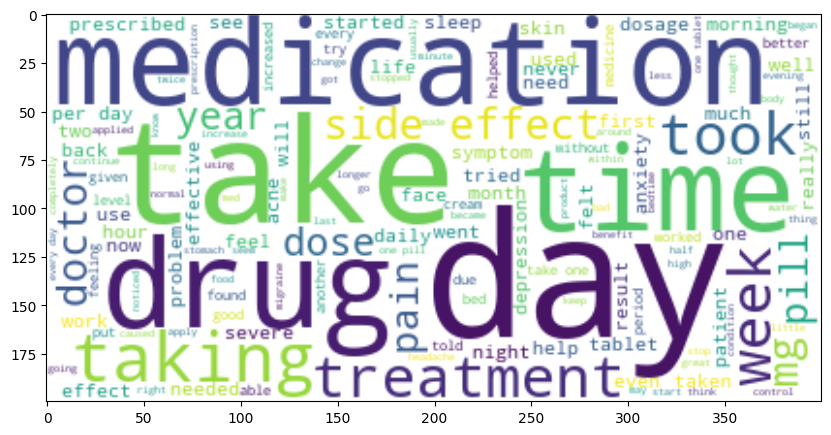

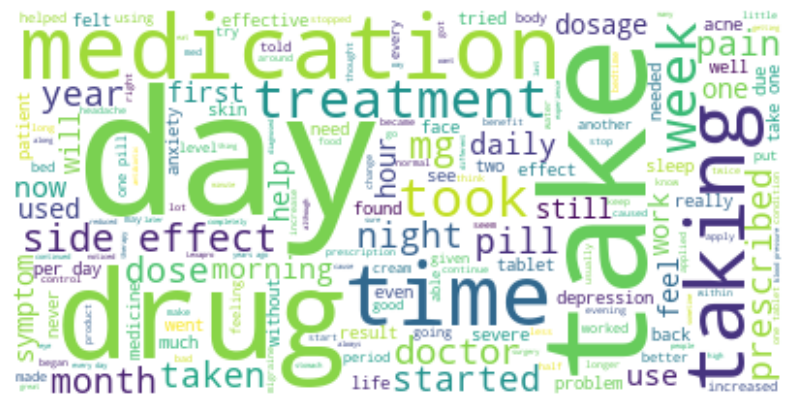

In [17]:
text1 = ' '.join(str(review) for review in df['benefitsReview'])
wordcloud1 = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud1, interpolation='bilinear')

text2 = ' '.join(str(review) for review in df['effectiveness'])
wordcloud2 = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud2, interpolation='bilinear')

text3 = ' '.join(str(review) for review in df['commentsReview'])
wordcloud3 = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

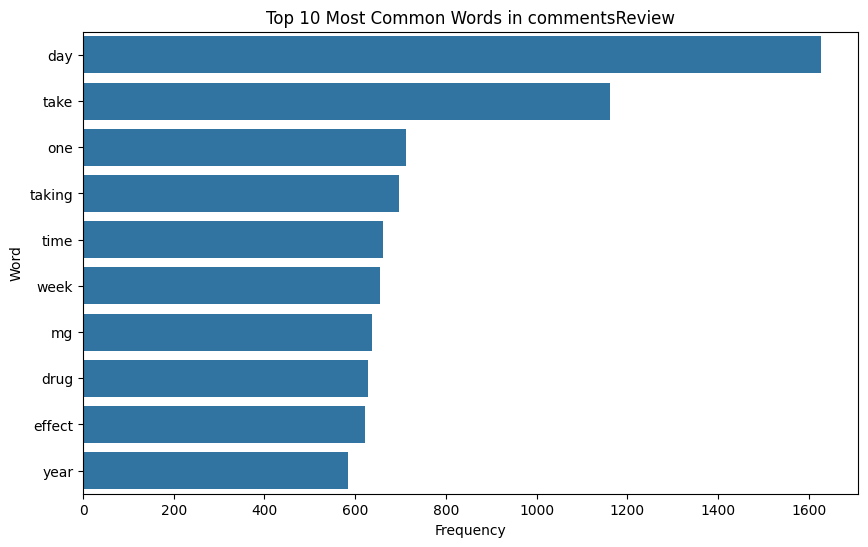

In [18]:
words = ' '.join(str(review) for review in df['commentsReview']).split()
word_counts = Counter(words)
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
word_counts_df.columns = ['Word', 'Frequency']
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_counts_df, orient='h')
plt.title('Top 10 Most Common Words in commentsReview')
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Ensure that do not contain any NaN values
df = df.dropna()

# Fit and transform the 'benefitsReview' column
tfidf_matrix_benefits = tfidf_vectorizer.fit_transform(df['benefitsReview'])
feature_names_benefits = tfidf_vectorizer.get_feature_names_out()
dense_matrix_benefits = tfidf_matrix_benefits.toarray()
df_tfidf_benefits = pd.DataFrame(dense_matrix_benefits, columns=feature_names_benefits)

# Fit and transform the 'sideEffectsReview' column
tfidf_matrix_sideEffects = tfidf_vectorizer.fit_transform(df['sideEffectsReview'])
feature_names_sideEffects = tfidf_vectorizer.get_feature_names_out()
dense_matrix_sideEffects = tfidf_matrix_sideEffects.toarray()
df_tfidf_sideEffects = pd.DataFrame(dense_matrix_sideEffects, columns=feature_names_sideEffects)

# Fit and transform the 'commentsReview' column
tfidf_matrix_comments = tfidf_vectorizer.fit_transform(df['commentsReview'])
feature_names_comments = tfidf_vectorizer.get_feature_names_out()
dense_matrix_comments = tfidf_matrix_comments.toarray()
df_tfidf_comments = pd.DataFrame(dense_matrix_comments, columns=feature_names_comments)



# # Concatenate the original DataFrame with the new DataFrames
# df_final = pd.concat([df, df_tfidf_comments, df_tfidf_benefits, df_tfidf_sideEffects], axis=1)
# # df_final = df_final.dropna()
# print(df_final['commentsReview'])

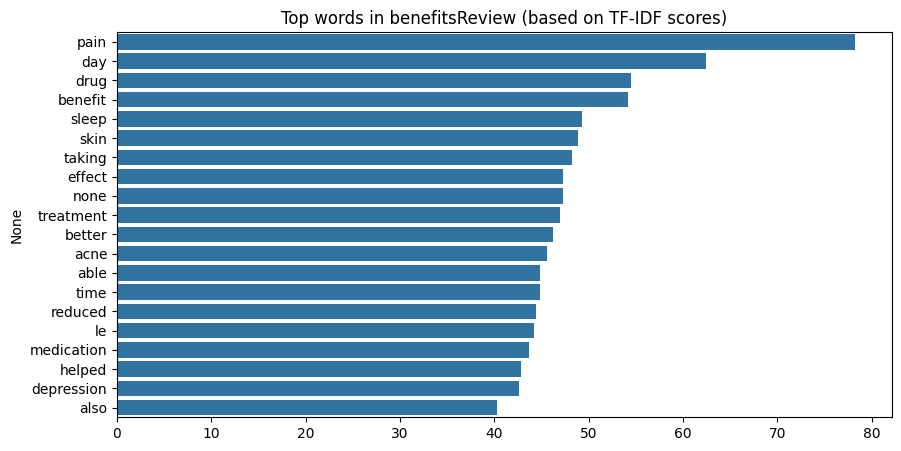

In [119]:
sums_benefits = df_tfidf_benefits.sum()
sums_sorted_benefits = sums_benefits.sort_values(ascending=False)
top_words_benefits = sums_sorted_benefits[:20]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_words_benefits.values, y=top_words_benefits.index)
plt.title('Top words in benefitsReview (based on TF-IDF scores)')
plt.show()

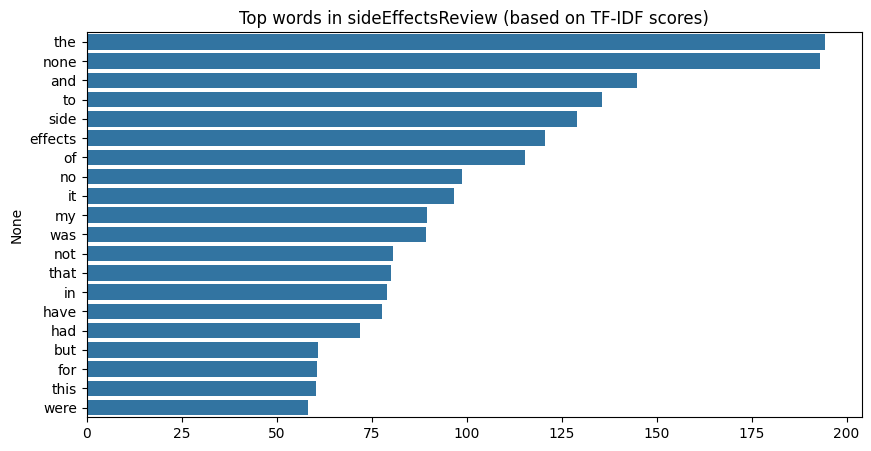

In [120]:
# For 'sideEffectsReview' column
sums_sideEffects = df_tfidf_sideEffects.sum()
sums_sorted_sideEffects = sums_sideEffects.sort_values(ascending=False)
top_words_sideEffects = sums_sorted_sideEffects[:20]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_words_sideEffects.values, y=top_words_sideEffects.index)
plt.title('Top words in sideEffectsReview (based on TF-IDF scores)')
plt.show()

Bag of words

In [121]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Initialize the CountVectorizer
# count_vectorizer = CountVectorizer()

# # Fit and transform the 'commentsReview' column
# bow_matrix_comments = count_vectorizer.fit_transform(df['commentsReview'])
# feature_names_comments = count_vectorizer.get_feature_names_out()
# dense_matrix_comments = bow_matrix_comments.toarray()
# df_bow_comments = pd.DataFrame(dense_matrix_comments, columns=feature_names_comments)

# # Fit and transform the 'benefitsReview' column
# bow_matrix_benefits = count_vectorizer.fit_transform(df['benefitsReview'])
# feature_names_benefits = count_vectorizer.get_feature_names_out()
# dense_matrix_benefits = bow_matrix_benefits.toarray()
# df_bow_benefits = pd.DataFrame(dense_matrix_benefits, columns=feature_names_benefits)

# # Fit and transform the 'sideEffectsReview' column
# bow_matrix_sideEffects = count_vectorizer.fit_transform(df['sideEffectsReview'])
# feature_names_sideEffects = count_vectorizer.get_feature_names_out()
# dense_matrix_sideEffects = bow_matrix_sideEffects.toarray()
# df_bow_sideEffects = pd.DataFrame(dense_matrix_sideEffects, columns=feature_names_sideEffects)

# # Concatenate the original DataFrame with the new DataFrames
# df_final_bow = pd.concat([df, df_bow_comments, df_bow_benefits, df_bow_sideEffects], axis=1)

Visulaizing Feature extracction by Bag of words

In [122]:
# # For 'commentsReview' column
# sums_comments = df_bow_comments.sum()
# sums_sorted_comments = sums_comments.sort_values(ascending=False)
# top_words_comments = sums_sorted_comments[:20]

# plt.figure(figsize=(10, 5))
# sns.barplot(x=top_words_comments.values, y=top_words_comments.index)
# plt.title('Top words in commentsReview (based on BoW counts)')
# plt.show()

# # For 'benefitsReview' column
# sums_benefits = df_bow_benefits.sum()
# sums_sorted_benefits = sums_benefits.sort_values(ascending=False)
# top_words_benefits = sums_sorted_benefits[:20]

# plt.figure(figsize=(10, 5))
# sns.barplot(x=top_words_benefits.values, y=top_words_benefits.index)
# plt.title('Top words in benefitsReview (based on BoW counts)')
# plt.show()

# # For 'sideEffectsReview' column
# sums_sideEffects = df_bow_sideEffects.sum()
# sums_sorted_sideEffects = sums_sideEffects.sort_values(ascending=False)
# top_words_sideEffects = sums_sorted_sideEffects[:20]

# plt.figure(figsize=(10, 5))
# sns.barplot(x=top_words_sideEffects.values, y=top_words_sideEffects.index)
# plt.title('Top words in sideEffectsReview (based on BoW counts)')
# plt.show()

In [27]:
from sklearn.ensemble import StackingRegressor, StackingClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Split your data into training and testing sets
# X_train, X_test, y_train_rating, y_train_effectiveness, y_train_sideEffect, y_test_rating, y_test_effectiveness, y_test_sideEffect


from sklearn.model_selection import train_test_split

# Assuming 'df_tfidf_benefits' is your features matrix (X) and
# 'df['rating']', 'df['effectiveness']', 'df['sideEffects']' are your labels (y)

# Splitting the data for rating prediction
X_train, X_test, y_train_rating, y_test_rating = train_test_split(
    df_tfidf_benefits, df['rating'], test_size=0.2, random_state=42)

# Splitting the data for effectiveness prediction
_, _, y_train_effectiveness, y_test_effectiveness = train_test_split(
    df_tfidf_benefits, df['effectiveness'], test_size=0.2, random_state=42, stratify=df['effectiveness'])

# Splitting the data for sideEffect prediction
_, _, y_train_sideEffect, y_test_sideEffect = train_test_split(
    df_tfidf_benefits, df['sideEffects'], test_size=0.2, random_state=42, stratify=df['sideEffects'])


# Define your base models
base_models = [
    ('rating_model', DecisionTreeRegressor()),
    ('effectiveness_model', DecisionTreeClassifier()),
    ('sideEffect_model', DecisionTreeClassifier())
]

# Train separate models for each target
rating_model = DecisionTreeRegressor().fit(X_train, y_train_rating)
effectiveness_model = DecisionTreeClassifier().fit(X_train, y_train_effectiveness)
sideEffect_model = DecisionTreeClassifier().fit(X_train, y_train_sideEffect)

# Get predictions from base models on the training set for the meta-model
rating_predictions = rating_model.predict(X_train)
effectiveness_predictions = effectiveness_model.predict_proba(X_train)  # Use probabilities for classification
sideEffect_predictions = sideEffect_model.predict_proba(X_train)  # Use probabilities for classification

# Combine predictions into a new feature set for the meta-model
stacked_features = np.column_stack((rating_predictions, effectiveness_predictions, sideEffect_predictions))

# Define and train your meta-model(s) - this is an example and you'll need to adapt this
# For regression
meta_model_regressor = Ridge()
meta_model_regressor.fit(stacked_features, y_train_rating)

# For classification - effectiveness
meta_model_classifier_effectiveness = LogisticRegression()
meta_model_classifier_effectiveness.fit(stacked_features, y_train_effectiveness)

# For classification - sideEffect
meta_model_classifier_sideEffect = LogisticRegression()
meta_model_classifier_sideEffect.fit(stacked_features, y_train_sideEffect)

# Now you have a trained meta-model for each output. When making predictions, you would:
# 1. Get predictions from base models
# 2. Stack those predictions
# 3. Use meta-models to make final predictions


TypeError: DecisionTreeRegressor.__init__() got an unexpected keyword argument 'max_iter'